In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [8]:
# Initial Setup

# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

### Step 1

In [9]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

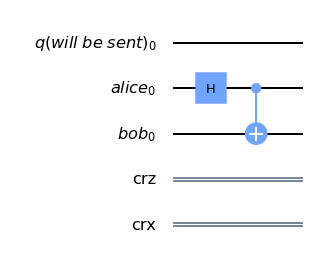

In [14]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw('mpl')

### Step 2

In [11]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

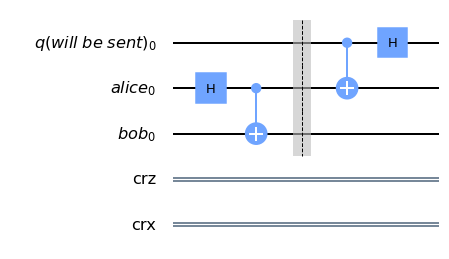

In [15]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)

# Step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')

### Step 3

In [16]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

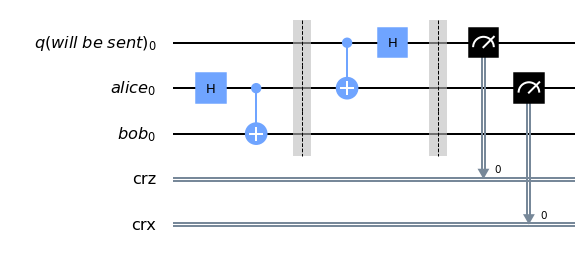

In [17]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)

# Step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

# Step 3
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')

### Step 4

In [18]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

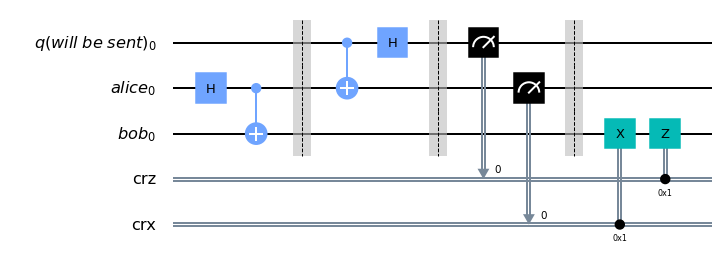

In [19]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)

# Step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

# Step 3
measure_and_send(teleportation_circuit, 0, 1)

# Step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

## Simulating the Teleportation Protocol

In [20]:
psi = random_state(1)

array_to_latex(psi, pretext="|\\psi\\rangle =")
plot_bloch_multivector(psi)

<IPython.core.display.Math object>

TypeError: '>' not supported between instances of 'int' and 'NoneType'

In [21]:
init_gate = Initialize(psi)
init_gate.label = "init"

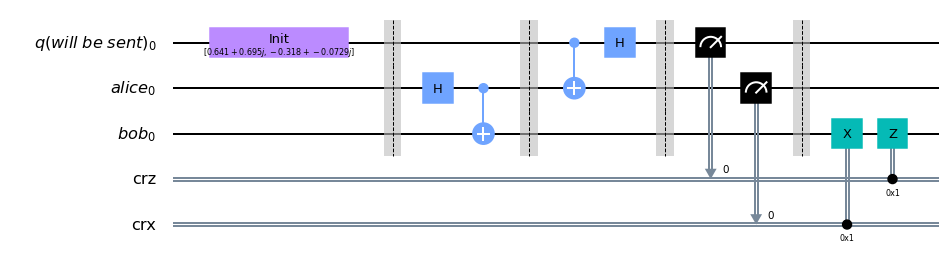

In [23]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

## Step 0
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)

# Step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

# Step 3
measure_and_send(teleportation_circuit, 0, 1)

# Step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

### statevector simulator

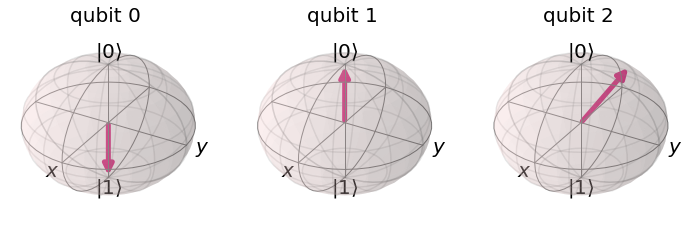

In [25]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(teleportation_circuit, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

### QASM simulator

In [30]:
inverse_init_gate = init_gate.gates_to_uncompute()

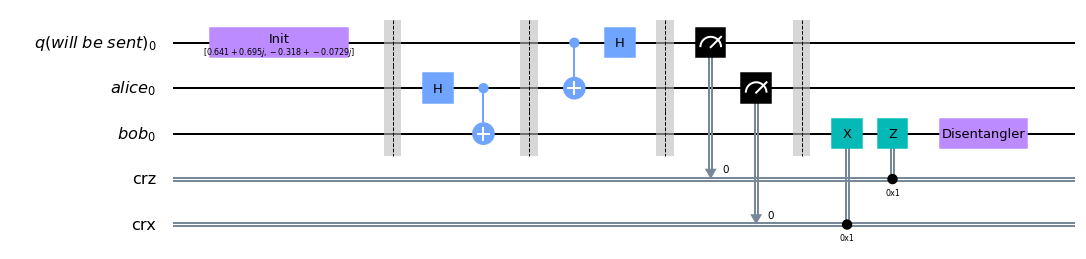

In [31]:
# Initial Setup
# qr = QuantumRegister(3, name='q')
qr = QuantumRegister(1, name='q(will be sent)')
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
# teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit = QuantumCircuit(qr, alice, bob, crz, crx)

## Step 0
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

# Step 1
create_bell_pair(teleportation_circuit, 1, 2)

# Step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

# Step 3
measure_and_send(teleportation_circuit, 0, 1)

# Step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)

# Step 5
teleportation_circuit.append(inverse_init_gate, [2])

teleportation_circuit.draw('mpl')

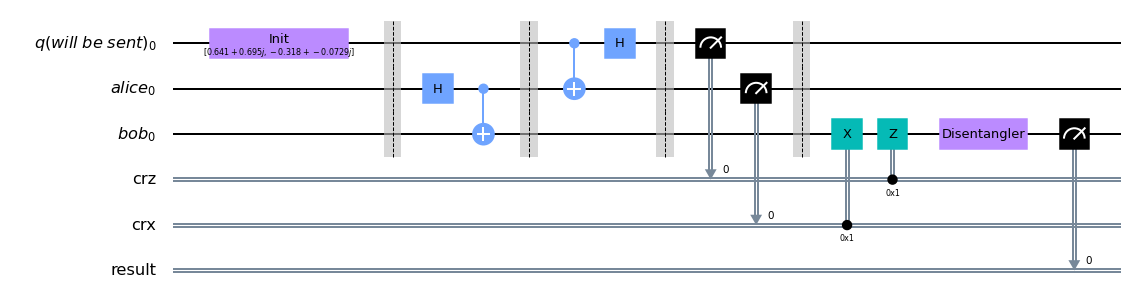

In [32]:
cr_result = ClassicalRegister(1,name='result')
teleportation_circuit.add_register(cr_result)
teleportation_circuit.measure(2,2)
teleportation_circuit.draw('mpl')

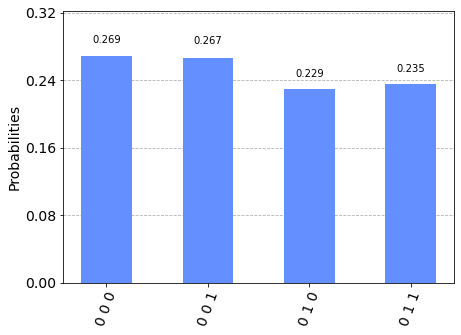

In [33]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(teleportation_circuit, backend, shots=1024).result().get_counts()
plot_histogram(counts)

bob0 is 0 in 100%.

## Teleportation on a Real Quantum Computer

In [34]:
def new_bob_gates(qc, a, b, c):
    qc.cz(a, c)
    qc.cx(b, c)

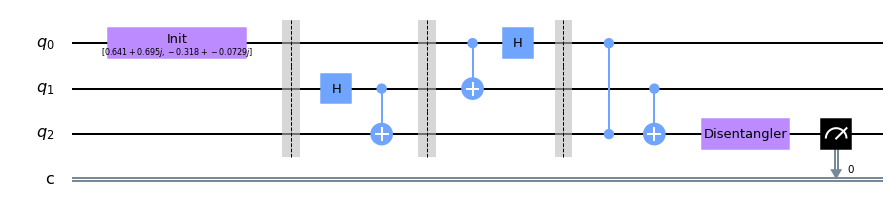

In [35]:
qc = QuantumCircuit(3,1)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)
qc.barrier()

new_bob_gates(qc, 0, 1, 2)

qc.append(inverse_init_gate, [2])

qc.measure(2,0)

qc.draw('mpl')

In [36]:
IBMQ.load_account()
from qiskit.tools.monitor import backend_overview
backend_overview()

C:\Users\hostaf\anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


ibmq_santiago                ibmq_armonk                  ibmq_valencia
-------------                -----------                  -------------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 23             Pending Jobs: 11             Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      122.2          Avg. T1:      170.7          Avg. T1:      99.8
Avg. T2:      136.4          Avg. T2:      201.3          Avg. T2:      73.4



ibmq_ourense                 ibmq_vigo                   ibmq_16_melbourne
------------                 ---------                   -----------------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  15
Pending Jobs: 16             Pending Jobs: 4             Pending Jobs: 16
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True   

In [38]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and 
                                      not b.configuration().simulator and b.status().operational==True))
jop_exp = execute(qc, backend=backend, shots=8192)

In [41]:
print(jop_exp.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(jop_exp)

5f7c5cad437c7b0012bb3649
Job Status: job has successfully run


{'0': 7174, '1': 1018}


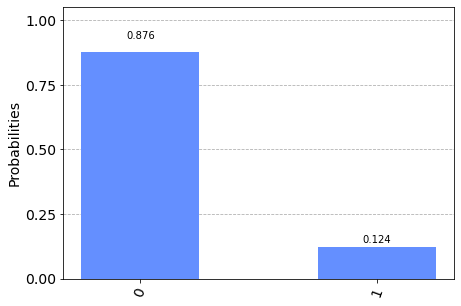

In [42]:
exp_result = jop_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [47]:
error_rate_percent = sum([exp_measurement_result[result] for result in exp_measurement_result.keys() if result[0]=='1']) \
                        * 100./sum(list(exp_measurement_result.values()))
print(f"The experiment error rate : {error_rate_percent} %")

The experiment error rate : 12.4267578125 %
